In [ ]:
# Let's use the second-order polynomial function to build an approximation function for the Boston dataset


Feature matrix shape: (506, 13)
Target vector shape: (506,)


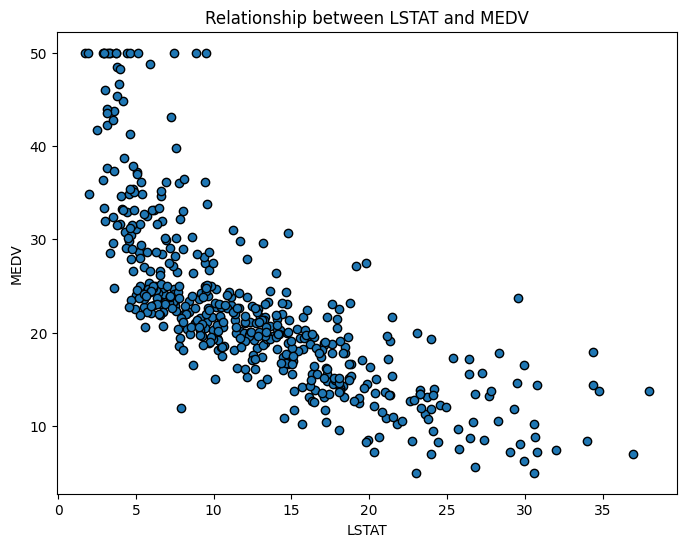

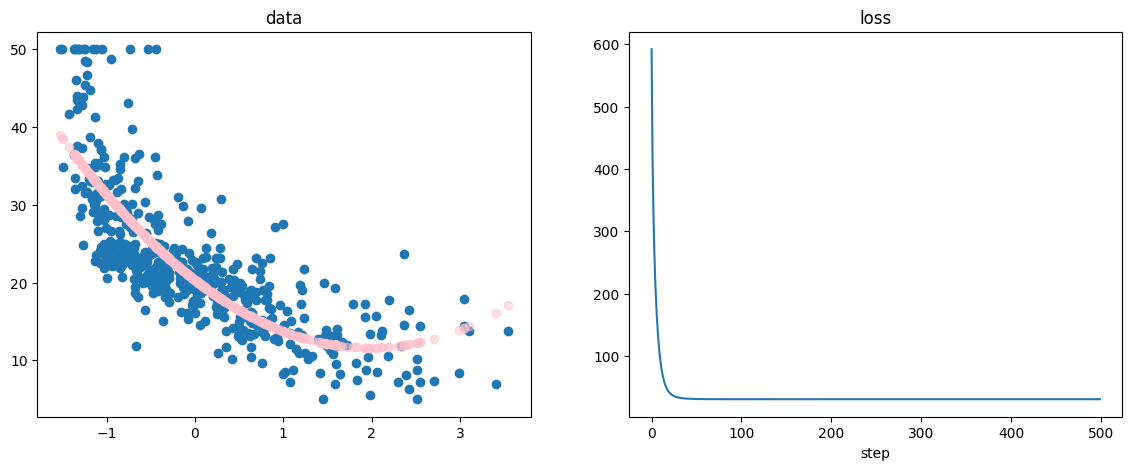

In [41]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from sklearn.datasets import fetch_openml
from IPython.display import clear_output

boston = fetch_openml(name="boston", version=1, as_frame=True)
print("Feature matrix shape:", boston.data.shape)
print("Target vector shape:", boston.target.shape)
df = boston.frame
plt.figure(figsize=(8,6))
plt.scatter(df['LSTAT'], df['MEDV'], alpha=1, edgecolors='k')
plt.title('Relationship between LSTAT and MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

xdata = torch.from_numpy(df['LSTAT'].values)
ydata = torch.from_numpy(df['MEDV'].values)
x_mean = xdata.mean()
x_std = xdata.std()
xdata = (xdata - x_mean) / x_std

# initialize parameters a, b, c

a = torch.zeros (1, requires_grad = True, dtype = torch.float64)
b = torch.zeros (1, requires_grad = True, dtype = torch.float64)
c = torch.zeros (1, requires_grad = True, dtype = torch.float64)
losses =[]
ypreds=[]
for i in range (500):
  y_pred = a*xdata*xdata + b*xdata + c
  if (i+1)%5==0:
    ypreds.append(y_pred)
  loss_func = ((y_pred-ydata)**2).mean()
  losses.append (loss_func.item())
  loss_func.backward()
  with torch.no_grad():
    a -= 0.05*a.grad
    b -= 0.05*b.grad
    c -= 0.05*c.grad
  a.grad.zero_()
  b.grad.zero_()
  c.grad.zero_()

plt.figure (figsize= (14,5))
plt.subplot (1,2,1)
plt.title ("data")
plt.scatter (xdata.numpy(), ydata.numpy())
plt.scatter(xdata.numpy(), ypreds[-1].detach().numpy(), color='pink', alpha=0.5)
plt.subplot (1,2,2)
plt.title ("loss")
plt.plot (losses)
plt.xlabel ('step')
plt.show()



In [ ]:
#  It is expected that the response variable y can be described by the independent variables x1 and x2.
#  1. Plot the observed values of y as a function of x1 and x2.
#  2. Estimate the parameters for the model
#  yi = b0 + b1x1,i + b2x2,i + delta

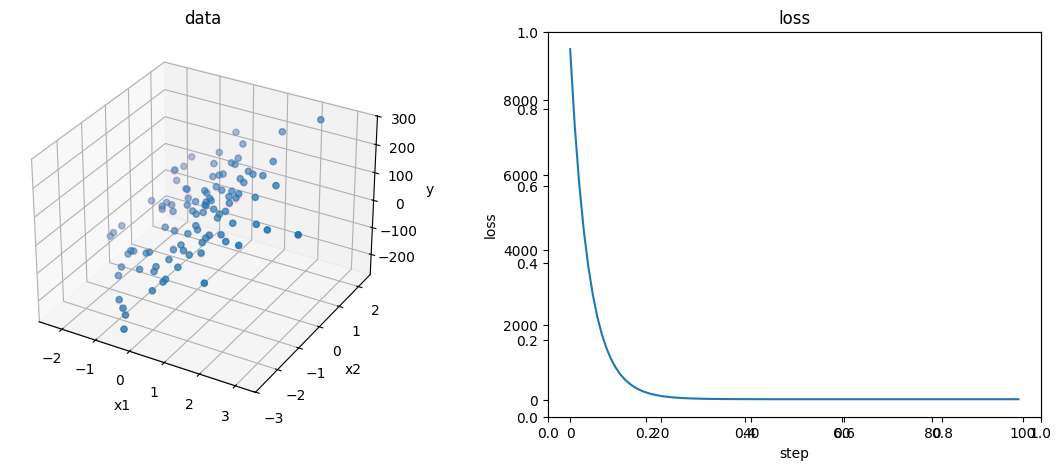

In [57]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from sklearn.datasets import fetch_openml
from IPython.display import clear_output


xdata1 = torch.randn (100,1)*10
xdata2 = torch.randn (100,1)*10
ydata = xdata1 *4 + xdata2*10 + 3*torch.randn (100,1)
x_mean = xdata1.mean()
x_std = xdata1.std()
xdata1 = (xdata1 - x_mean) / x_std
x_mean2 = xdata2.mean()
x_std2 = xdata2.std()
xdata2 = (xdata2 - x_mean2) / x_std2

# initialize parameters a, b, c

a = torch.zeros (1, requires_grad = True, dtype = torch.float64)
b = torch.zeros (1, requires_grad = True, dtype = torch.float64)
c = torch.zeros (1, requires_grad = True, dtype = torch.float64)
losses =[]
ypreds=[]
for i in range (100):
  y_pred = a*xdata1 + b*xdata2 + c
  if (i+1)%5==0:
    ypreds.append(y_pred)
  loss_func = ((y_pred-ydata)**2).mean()
  losses.append (loss_func.item())
  loss_func.backward()
  with torch.no_grad():
    a -= 0.05*a.grad
    b -= 0.05*b.grad
    c -= 0.05*c.grad
  a.grad.zero_()
  b.grad.zero_()
  c.grad.zero_()
fig = plt.figure (figsize= (14,5))
ax = fig.add_subplot (121, projection = '3d')
ax.scatter (xdata1.numpy(), xdata2.numpy(), ydata.numpy())
ax.scatter(xdata1.numpy(), xdata2.numpy(), ypreds[-1].detach().numpy(), color='pink', alpha=0.5)
ax.set_xlabel ("x1")
ax.set_ylabel ("x2")
ax.set_zlabel ("y")
plt.title ("data")
plt.subplot (1,2,2)
ax2 = fig.add_subplot (122)
ax2.set_title ("loss")
ax2.plot (losses)
ax2.set_xlabel ('step')
ax2.set_ylabel ('loss')
plt.show()

